# **You're Hired!**

# **Job Placement Analysis and Prediction**

This project performs job placement analyis and consists of machine learning models to predict which candidate will get hired based on certain criteria. 

# 1. Importing all the libraries required for the project

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/job-placement-dataset/Job_Placement_Data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# 2. Uploading the dataset

In [3]:
data = pd.read_csv("/kaggle/input/job-placement-dataset/Job_Placement_Data.csv")
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


# 3. Checking for null and duplicate values

In [4]:
data.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [5]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
210    False
211    False
212    False
213    False
214    False
Length: 215, dtype: bool

# 4. Getting the basic info and statistical data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [7]:
data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


# 5. Visualising the trends and patterns between different features

<AxesSubplot:xlabel='gender', ylabel='count'>

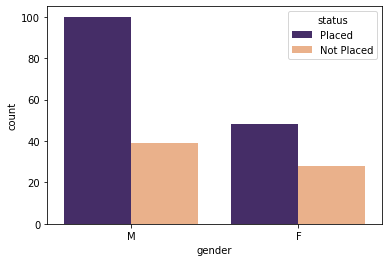

In [8]:
sns.countplot(x = data['gender'], hue = data['status'], palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='specialisation', ylabel='count'>

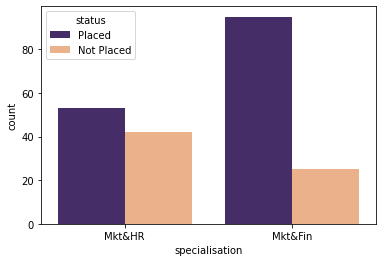

In [9]:
sns.countplot(x = data['specialisation'], hue = data['status'], palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='work_experience', ylabel='count'>

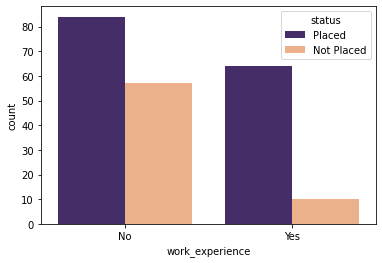

In [10]:
sns.countplot(x = data['work_experience'], hue = data['status'], palette=['#432371',"#FAAE7B"])

<AxesSubplot:xlabel='undergrad_degree', ylabel='count'>

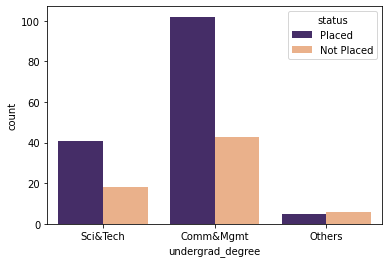

In [11]:
sns.countplot(x = data['undergrad_degree'], hue = data['status'], palette=['#432371',"#FAAE7B"])

# 6. For building machine learning models, converting the categorical data into numerical (binary) data

In [12]:
data['gender'].value_counts()
gender_n = {'M':0,'F':1}
data['gender']=data['gender'].map(gender_n)

data['ssc_board'].value_counts()
ssc = {'Central':1,'Others':0}
data['ssc_board'] = data['ssc_board'].map(ssc)

data['hsc_board'].value_counts()
hsc = {'Central':1,'Others':0}
data['hsc_board'] = data['hsc_board'].map(hsc)

data['hsc_subject'].value_counts()

data['undergrad_degree'].value_counts()

data['work_experience'].value_counts()
work = {'Yes':1,'No':0}
data['work_experience']=data['work_experience'].map(work)

data['specialisation'].value_counts()
spec = {'Mkt&Fin':1,'Mkt&HR':0}
data['specialisation'] = data['specialisation'].map(spec)

data['status'].value_counts()
status = {'Placed':1,'Not Placed':0}
data['status'] = data['status'].map(status)

In [13]:
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,0,67.00,0,91.00,0,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1
1,0,79.33,1,78.33,0,Science,77.48,Sci&Tech,1,86.5,1,66.28,1
2,0,65.00,1,68.00,1,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1
3,0,56.00,1,52.00,1,Science,52.00,Sci&Tech,0,66.0,0,59.43,0
4,0,85.80,1,73.60,1,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,Commerce,77.60,Comm&Mgmt,0,91.0,1,74.49,1
211,0,58.00,0,60.00,0,Science,72.00,Sci&Tech,0,74.0,1,53.62,1
212,0,67.00,0,67.00,0,Commerce,73.00,Comm&Mgmt,1,59.0,1,69.72,1
213,1,74.00,0,66.00,0,Commerce,58.00,Comm&Mgmt,0,70.0,0,60.23,1


In [14]:
#for categorical data
data = pd.get_dummies(data,drop_first=True)
data

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
0,0,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,1,0,0,1
1,0,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,0,1,0,1
2,0,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,0,0,0,0
3,0,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,1,0,1
4,0,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,0,82.00,0,77.60,0,91.0,1,74.49,1,1,0,0,0
211,0,58.00,0,60.00,0,72.00,0,74.0,1,53.62,1,0,1,0,1
212,0,67.00,0,67.00,0,73.00,1,59.0,1,69.72,1,1,0,0,0
213,1,74.00,0,66.00,0,58.00,0,70.0,0,60.23,1,1,0,0,0


In [15]:
data.describe()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,0.539535,66.333163,0.390698,66.370186,0.344186,72.100558,0.558140,62.278186,0.688372,0.525581,0.423256,0.051163,0.274419
std,0.479168,10.827205,0.499598,10.897509,0.489045,7.358743,0.476211,13.275956,0.497767,5.833385,0.464240,0.500510,0.495228,0.220844,0.447262
min,0.000000,40.890000,0.000000,37.000000,0.000000,50.000000,0.000000,50.000000,0.000000,51.210000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,61.000000,0.000000,60.000000,0.000000,57.945000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,67.000000,1.000000,65.000000,0.000000,66.000000,0.000000,71.000000,1.000000,62.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,72.000000,1.000000,83.500000,1.000000,66.255000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,91.000000,1.000000,98.000000,1.000000,77.890000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
data.corr()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,degree_percentage,work_experience,emp_test_percentage,specialisation,mba_percent,status,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech
gender,1.000000,0.068969,0.019429,0.021334,0.065945,0.173217,-0.085153,-0.084294,-0.106160,0.300531,-0.090670,0.001087,-0.042682,0.093246,-0.084072
ssc_percentage,0.068969,1.000000,-0.116194,0.511472,-0.066996,0.538404,0.175675,0.261993,0.172536,0.388478,0.607889,-0.101323,0.189847,-0.066127,0.221235
ssc_board,0.019429,-0.116194,1.000000,0.137013,0.605883,-0.038070,0.040744,0.018991,-0.051565,-0.083120,-0.037297,0.056671,-0.058505,0.002758,-0.101060
hsc_percentage,0.021334,0.511472,0.137013,1.000000,0.019548,0.434206,0.141025,0.245113,0.241630,0.354823,0.491228,0.258093,-0.226675,-0.131382,-0.053599
hsc_board,0.065945,-0.066996,0.605883,0.019548,1.000000,-0.067229,-0.038357,-0.039108,0.002232,-0.090201,-0.016945,0.073522,-0.126446,0.116920,-0.086548
degree_percentage,0.173217,0.538404,-0.038070,0.434206,-0.067229,1.000000,0.122648,0.224470,0.218286,0.402364,0.479861,-0.022724,0.092006,-0.180408,0.123477
work_experience,-0.085153,0.175675,0.040744,0.141025,-0.038357,0.122648,1.000000,0.056735,0.191174,0.168811,0.276060,-0.056719,0.033270,0.009507,0.102962
emp_test_percentage,-0.084294,0.261993,0.018991,0.245113,-0.039108,0.224470,0.056735,1.000000,0.236315,0.218055,0.127639,-0.021732,0.055352,0.006907,0.009748
specialisation,-0.106160,0.172536,-0.051565,0.241630,0.002232,0.218286,0.191174,0.236315,1.000000,0.105728,0.250655,0.129985,-0.166639,-0.090948,-0.061503
mba_percent,0.300531,0.388478,-0.083120,0.354823,-0.090201,0.402364,0.168811,0.218055,0.105728,1.000000,0.076922,-0.049415,0.048050,-0.036055,0.125009


# 7. Choosing the features and target from the converted and updated dataset

In [17]:
features = data.columns.tolist()
features = set(features) - {'status'} 
x_train,x_test,y_train,y_test = train_test_split(data[features] ,data.status ,test_size=0.2)

# 8. Building the models

**1. Logistic Regression**

In [18]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(x_train, y_train)
pred_lr = lr_model.predict(x_test)
acc_lr = accuracy_score(y_test, pred_lr)
print(acc_lr)
conf_lr = confusion_matrix(y_test,pred_lr)
conf_lr

0.8372093023255814


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[ 7,  3],
       [ 4, 29]])

**2. Guassian Naive-Bayes**

In [19]:
gNB_model = GaussianNB()
gNB_model.fit(x_train,y_train)
pred_gNB = gNB_model.predict(x_test)
acc_gNB = accuracy_score(y_test,pred_gNB)
print(acc_gNB)
conf_gNB = confusion_matrix(y_test,pred_gNB)
conf_gNB

0.7906976744186046


array([[ 6,  4],
       [ 5, 28]])

**3. K Neighbors Classifier**

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)
pred_knn = knn_model.predict(x_test)
acc_knn = accuracy_score(y_test, pred_knn)
print(acc_knn)
conf_knn = confusion_matrix(y_test,pred_knn)
conf_knn

0.9302325581395349


array([[ 9,  1],
       [ 2, 31]])

**4. Decision Tree Classifier**

In [21]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(x_train, y_train)
pred_dt = dt_model.predict(x_test)
acc_dt = accuracy_score(y_test, pred_dt)
print(acc_dt)
conf_dt = confusion_matrix(y_test,pred_dt)
conf_dt

0.8604651162790697


array([[ 8,  2],
       [ 4, 29]])

**5. Random Forest Classifier**

In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
pred_rf = rf_model.predict(x_test)
acc_rf = accuracy_score(y_test, pred_rf)
print(acc_rf)
conf_rf = confusion_matrix(y_test,pred_rf)
conf_rf

0.9069767441860465


array([[ 8,  2],
       [ 2, 31]])

**6. XGB Classifier**

In [23]:
xgb_model = XGBClassifier(n_estimators=200)
xgb_model.fit(x_train, y_train)
pred_xgb = xgb_model.predict(x_test)
acc_xgb = accuracy_score(y_test, pred_xgb)
print(acc_xgb)
conf_xgb = confusion_matrix(y_test,pred_xgb)
conf_xgb

0.8837209302325582


array([[ 9,  1],
       [ 4, 29]])